[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Real-Time Stock Prices:
Tesla (2025-03-19):
  Open: $231.61
  High: $241.41
  Low: $229.20
  Close: $235.86
Mercedes-Benz (2025-03-19):
  Open: $16.36
  High: $16.38
  Low: $16.14
  Close: $16.32
BYD (2025-03-20):
  Open: $108.79
  High: $108.79
  Low: $108.50
  Close: $108.48
Xiaopeng (2025-03-19):
  Open: $23.27
  High: $24.20
  Low: $22.83
  Close: $23.80
Toyota (2025-03-19):
  Open: $192.48
  High: $193.72
  Low: $191.76
  Close: $193.14
Ford (2025-03-19):
  Open: $9.96
  High: $10.28
  Low: $9.95
  Close: $10.17
Audi (via Volkswagen) (2025-03-19):
  Open: $11.88
  High: $11.92
  Low: $11.79
  Close: $11.84
BMW (2025-03-20):
  Open: $82.36
  High: $82.72
  Low: $80.38
  Close: $80.56
Hyundai (2025-03-19):
  Open: $51.00
  High: $51.00
  Low: $50.40
  Close: $50.70
Volkswagen (2025-03-19):
  Open: $11.88
  High: $11.92
  Low: $11.79
  Close: $11.84



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******


Weekly Stock Report (Last Available Week):

Tesla:
  Open: $245.06
  High: $245.40
  Low: $222.28
  Close: $235.86

Mercedes-Benz:
  Open: $16.25
  High: $16.70
  Low: $16.14
  Close: $16.32

BYD:
  Open: $100.09
  High: $108.79
  Low: $100.07
  Close: $108.48

Xiaopeng:
  Open: $24.27
  High: $24.77
  Low: $22.00
  Close: $23.80

Toyota:
  Open: $186.54
  High: $193.72
  Low: $186.44
  Close: $193.14

Ford:
  Open: $9.74
  High: $10.28
  Low: $9.74
  Close: $10.17

Audi (via Volkswagen):
  Open: $12.08
  High: $12.20
  Low: $11.79
  Close: $11.84

BMW:
  Open: $82.10
  High: $86.38
  Low: $80.38
  Close: $80.56

Hyundai:
  Open: $48.00
  High: $51.00
  Low: $48.00
  Close: $50.70

Volkswagen:
  Open: $12.08
  High: $12.20
  Low: $11.79
  Close: $11.84


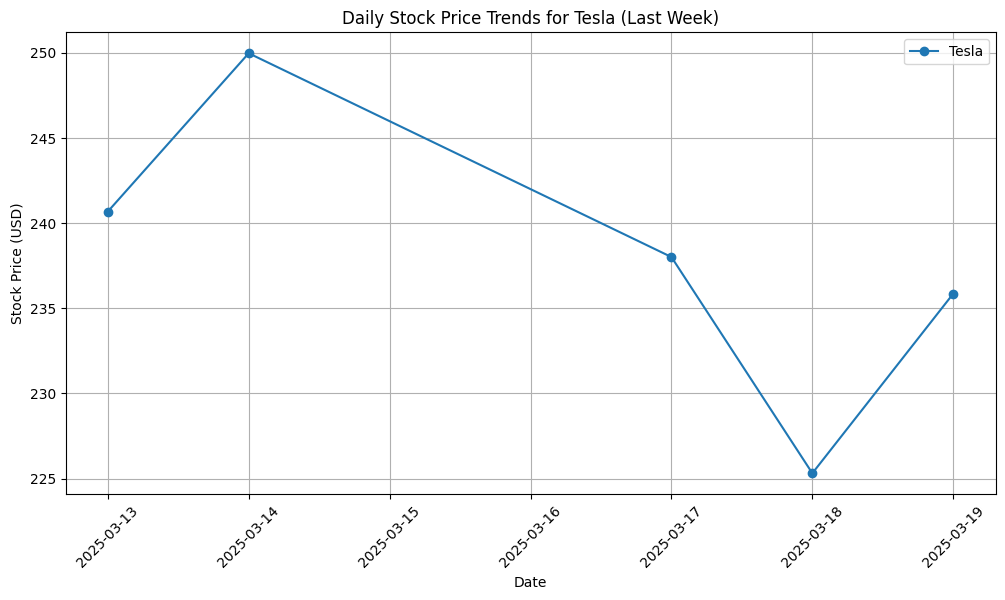

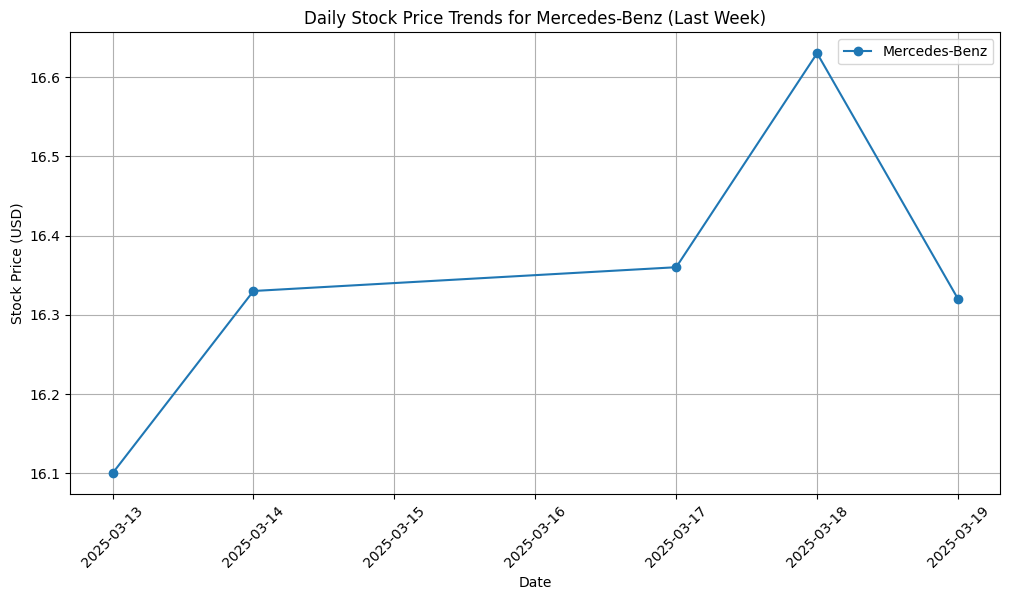

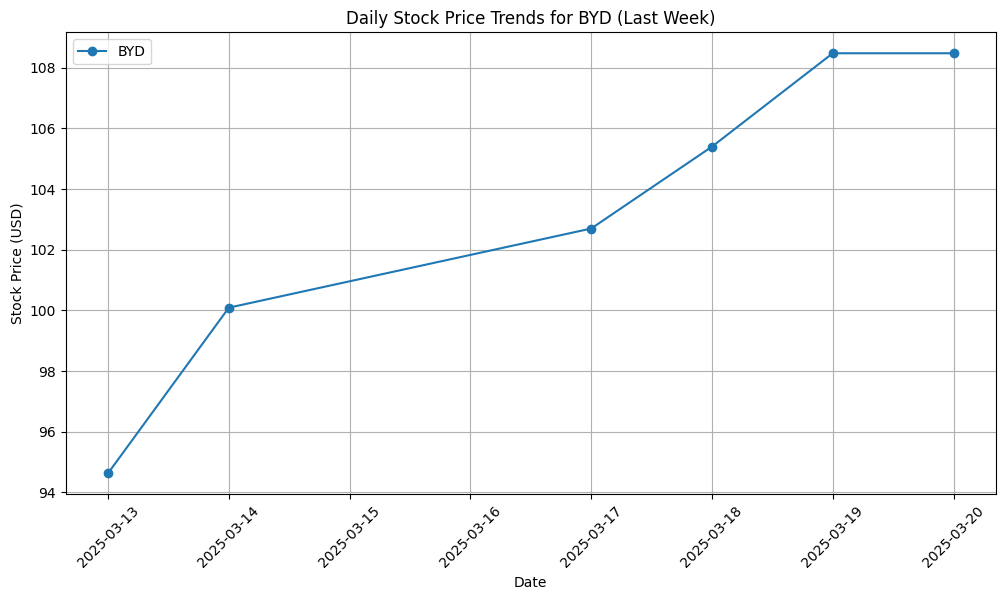

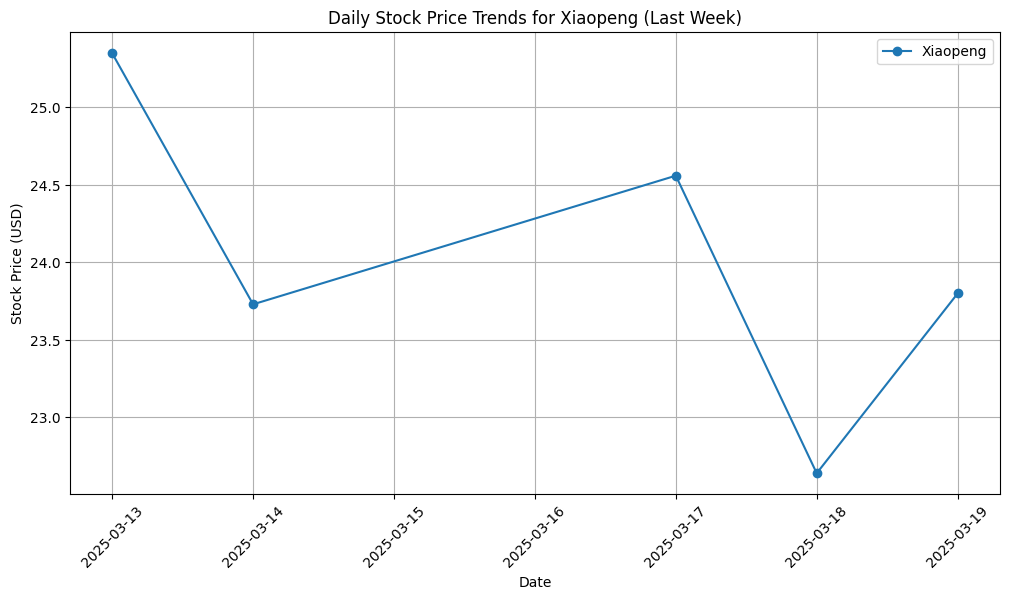

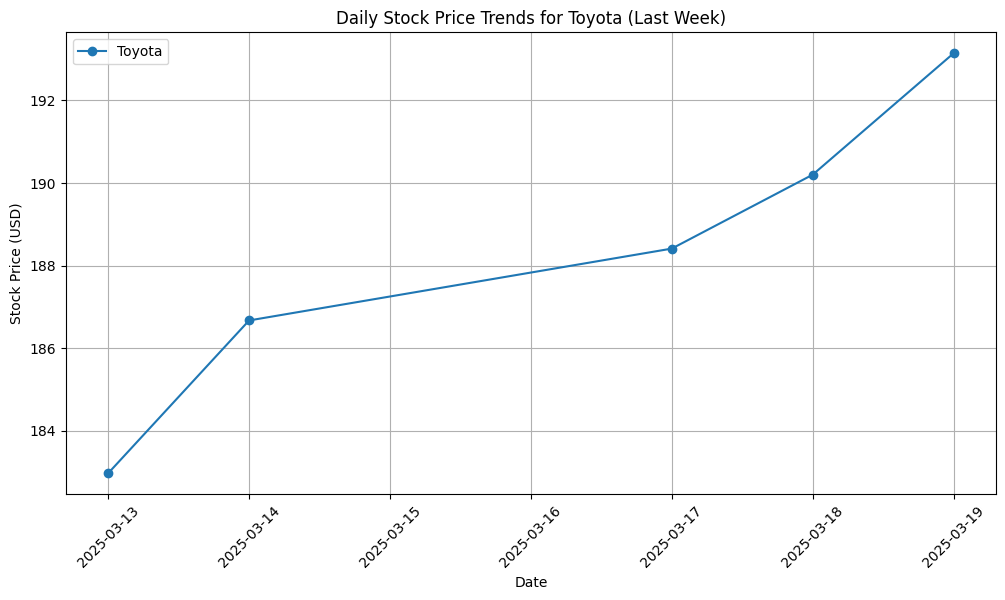

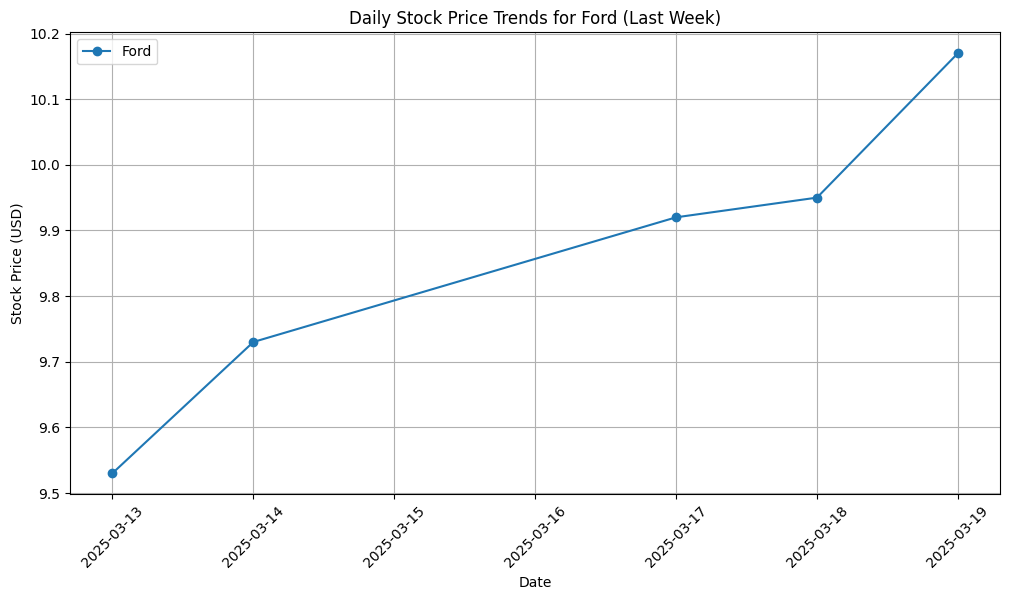

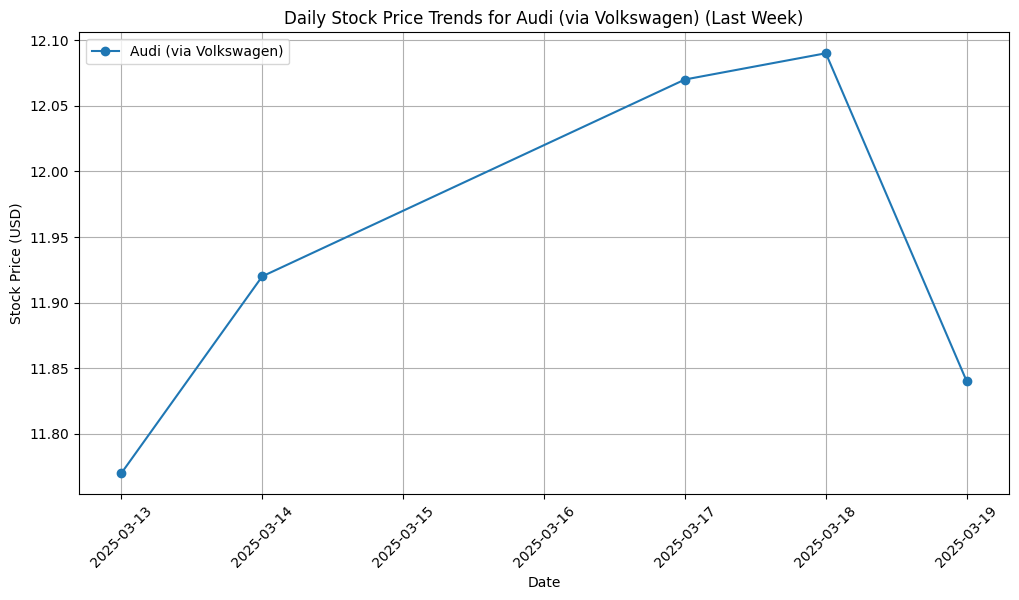

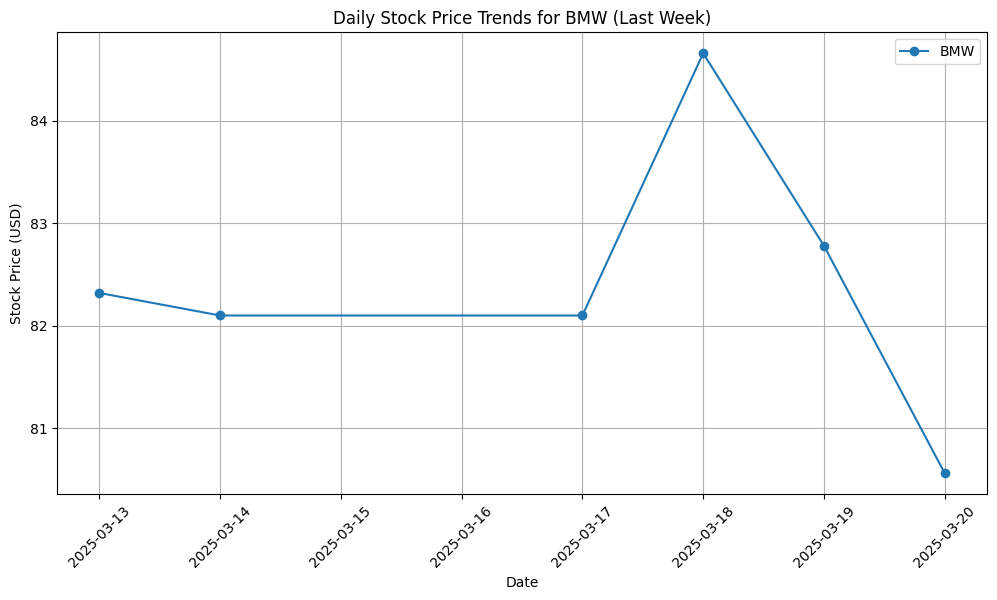

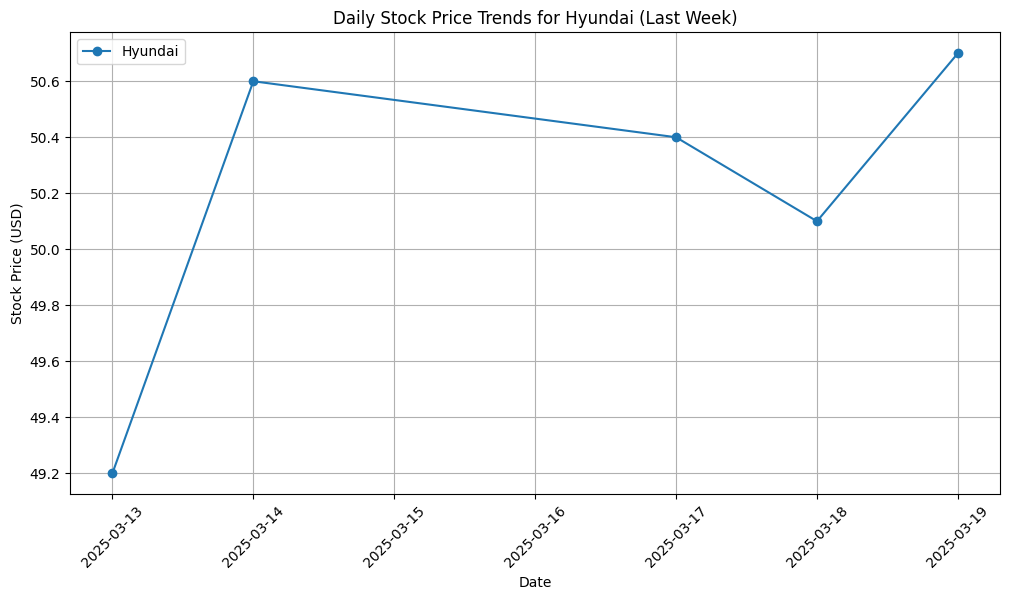

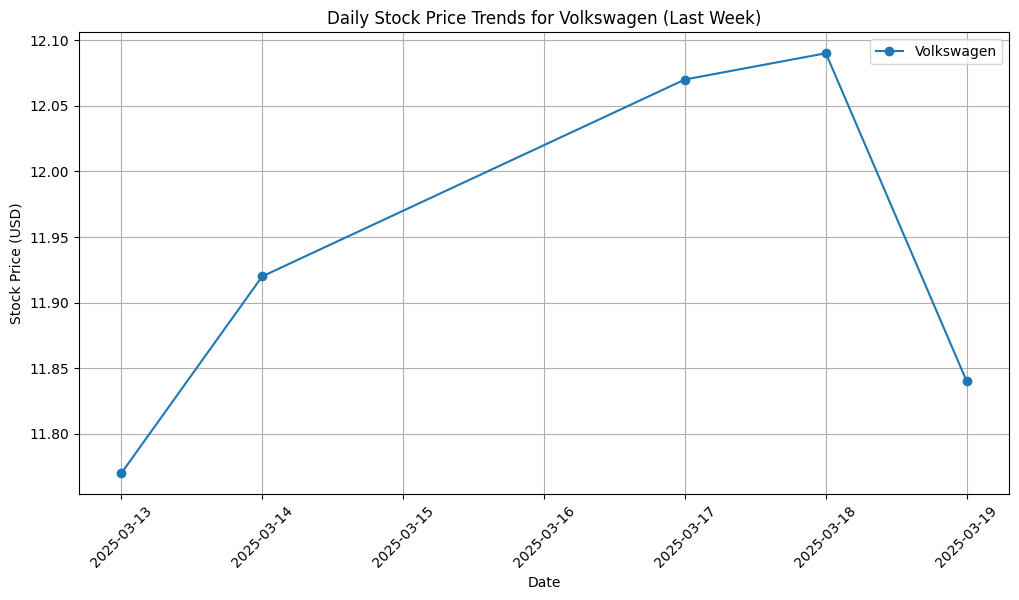

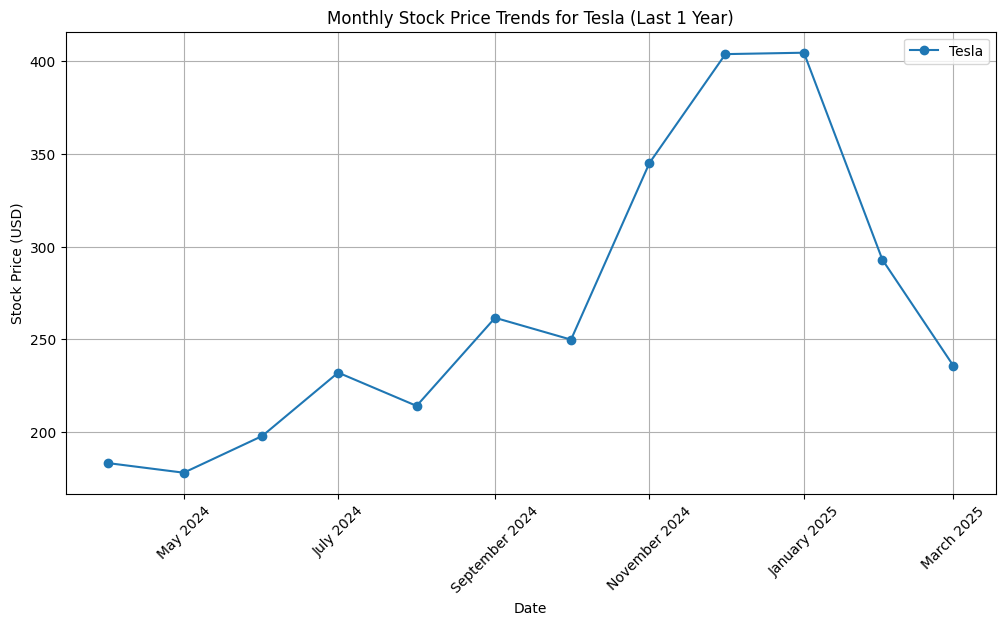

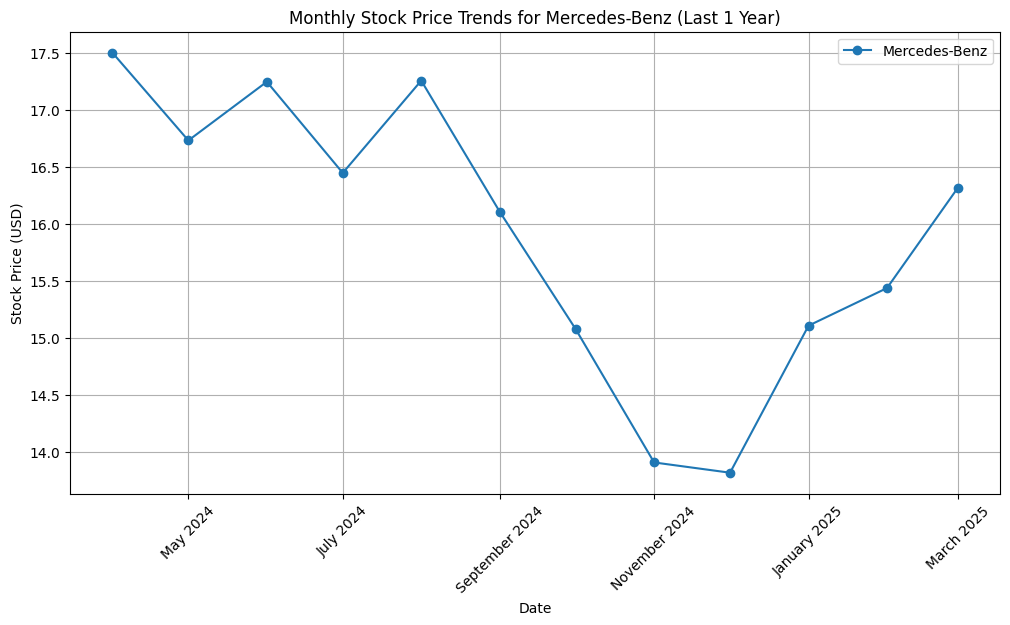

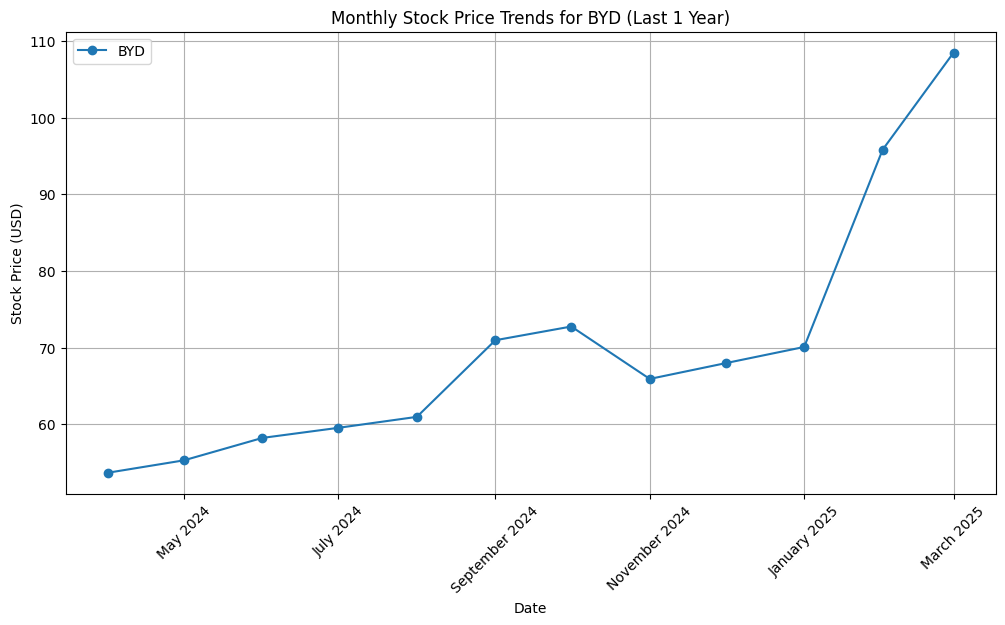

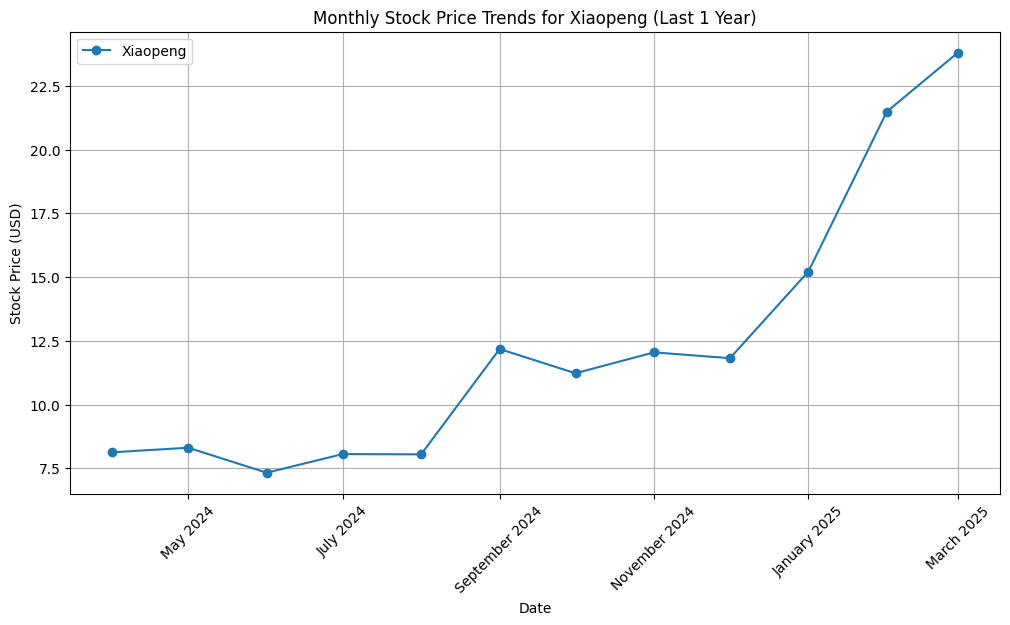

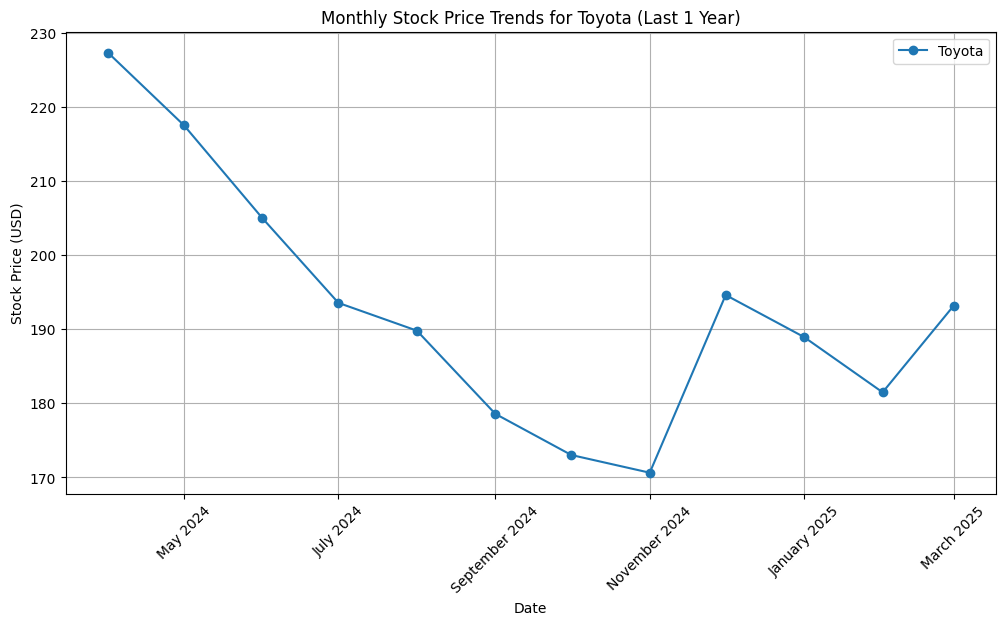

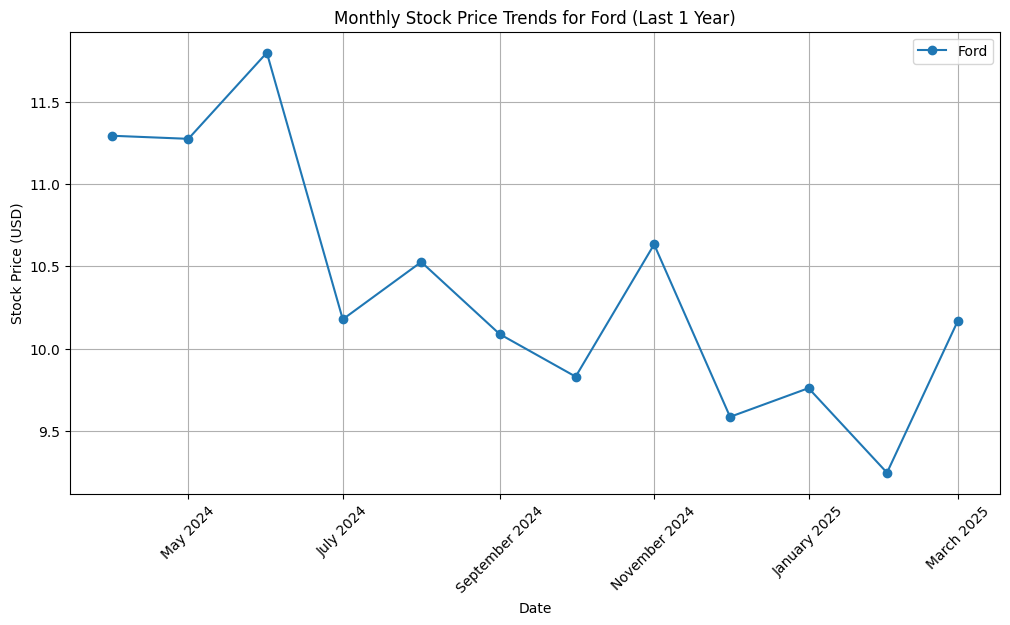

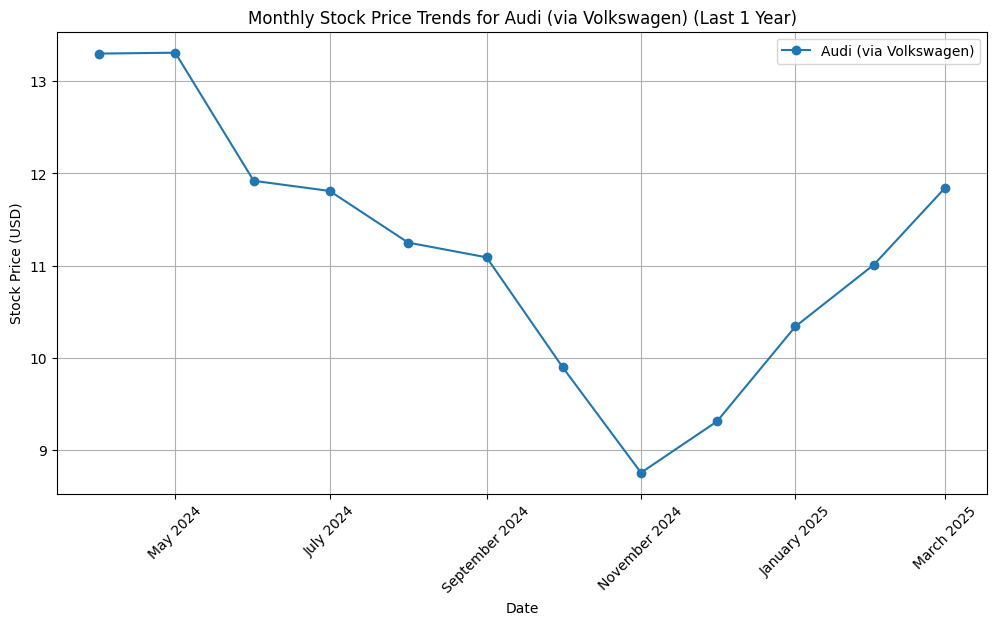

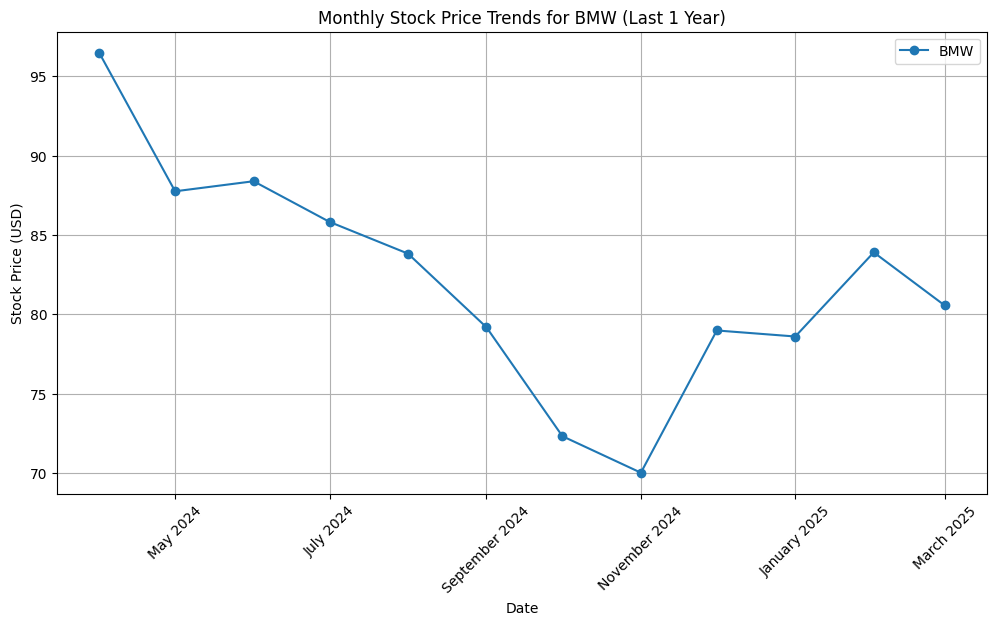

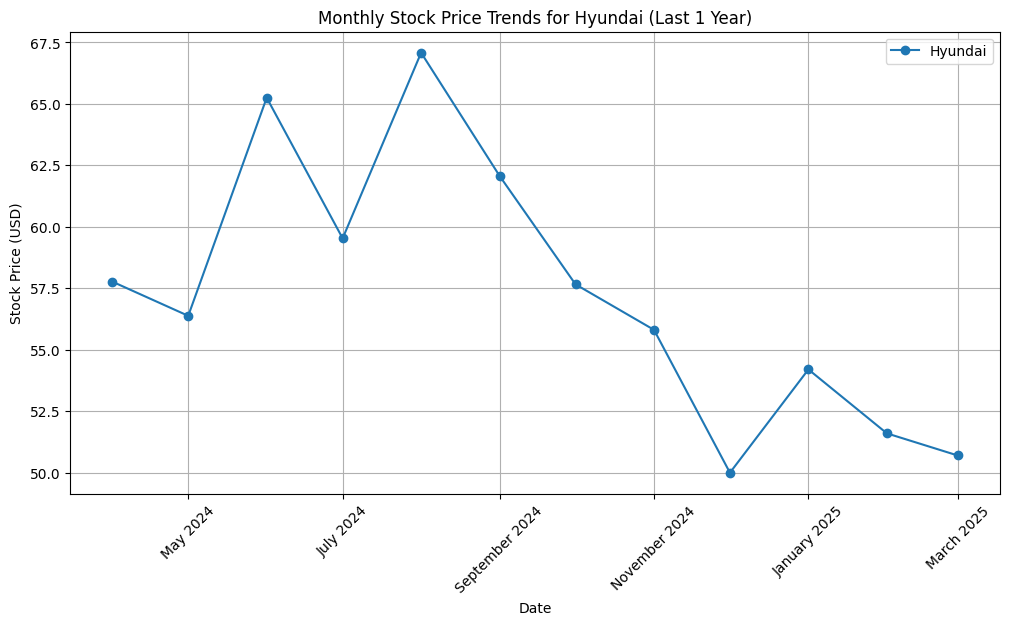

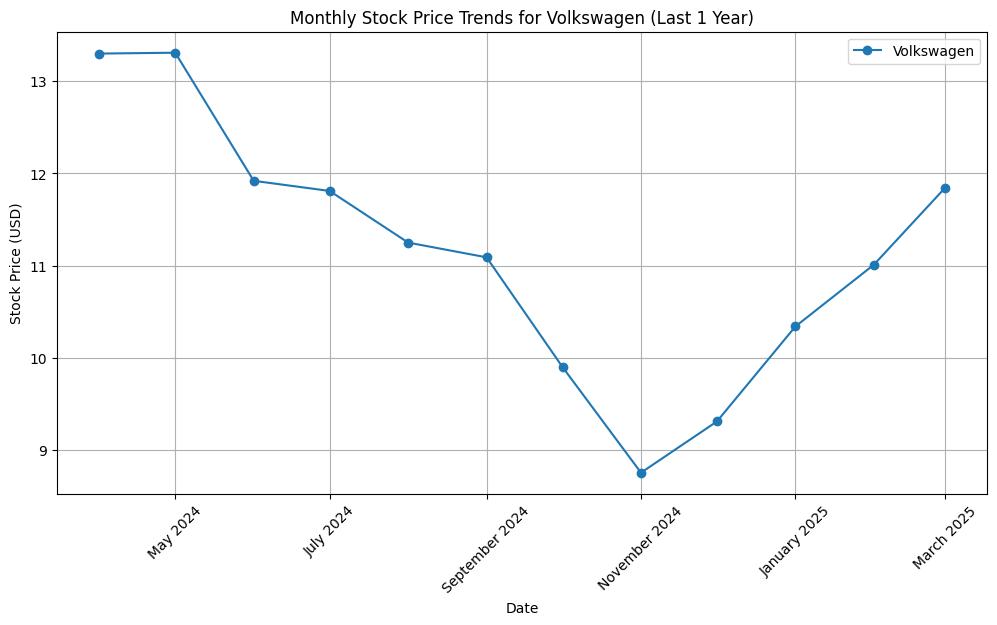

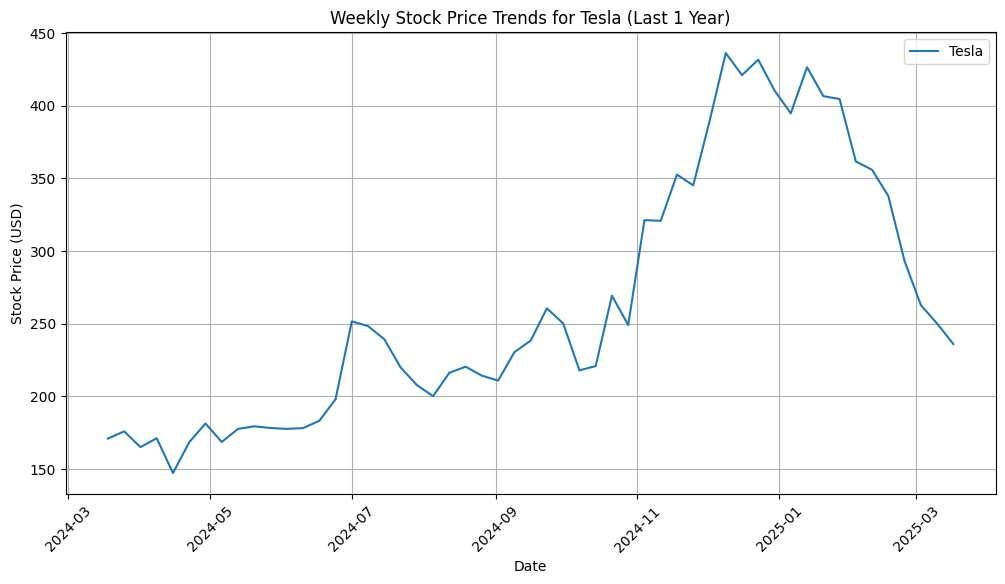

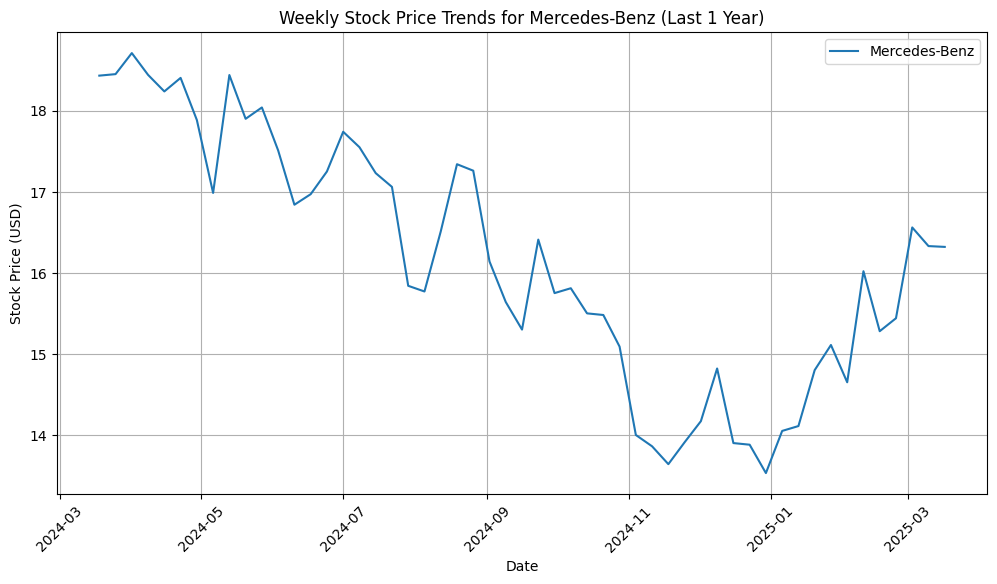

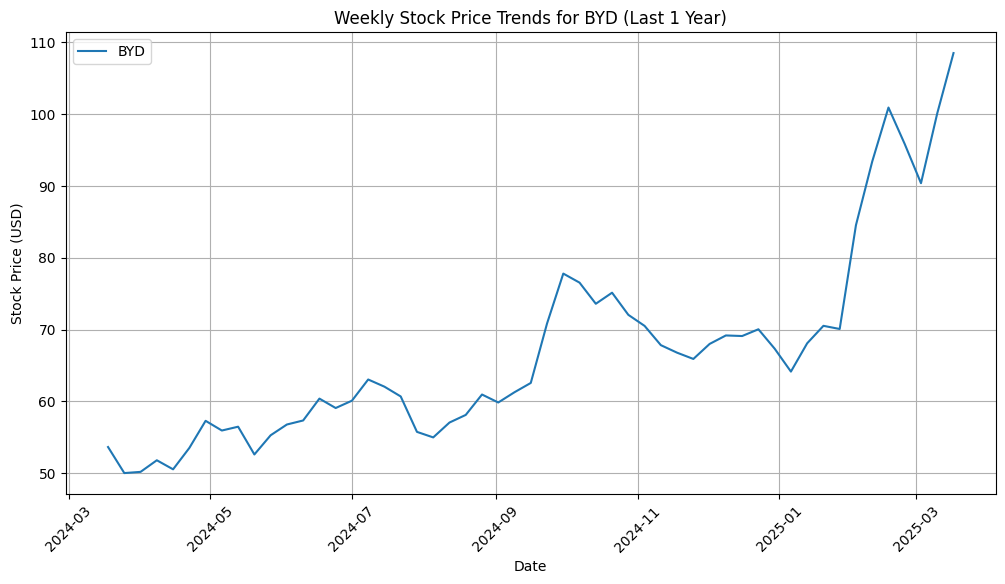

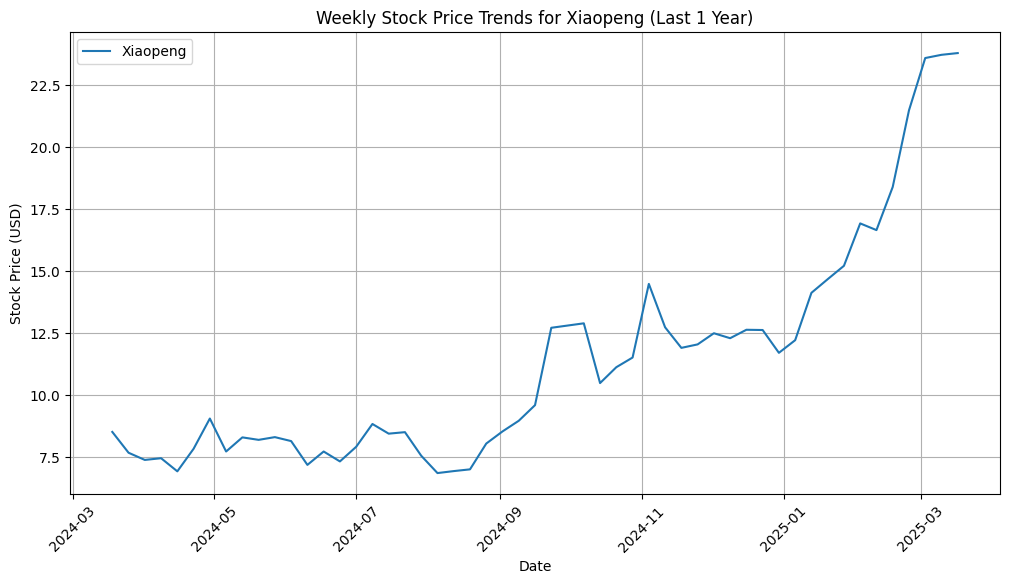

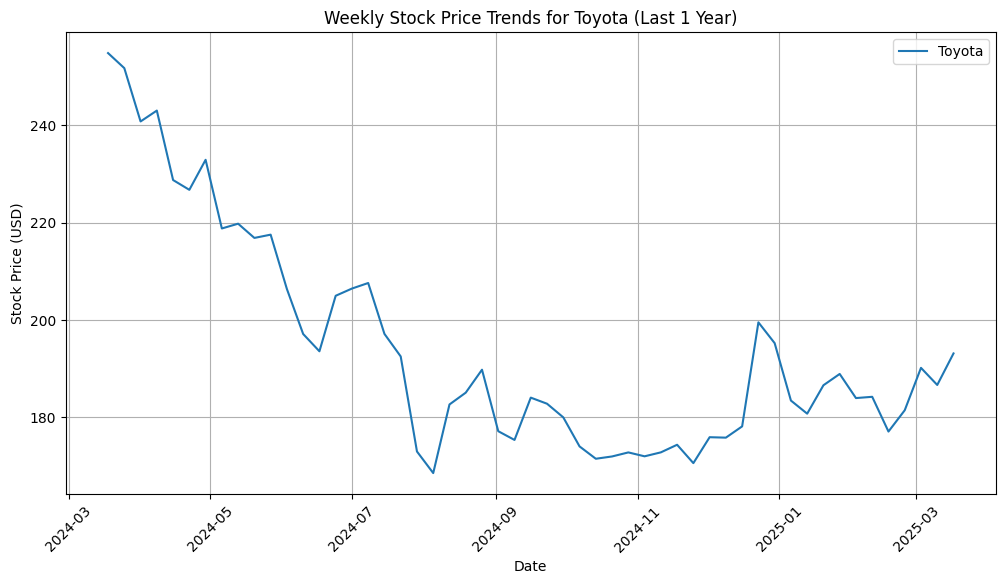

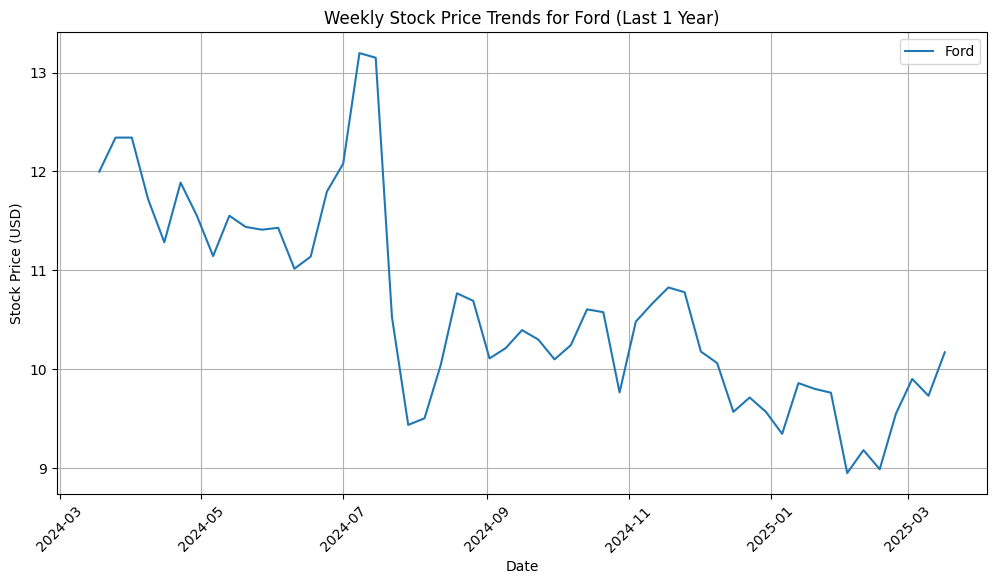

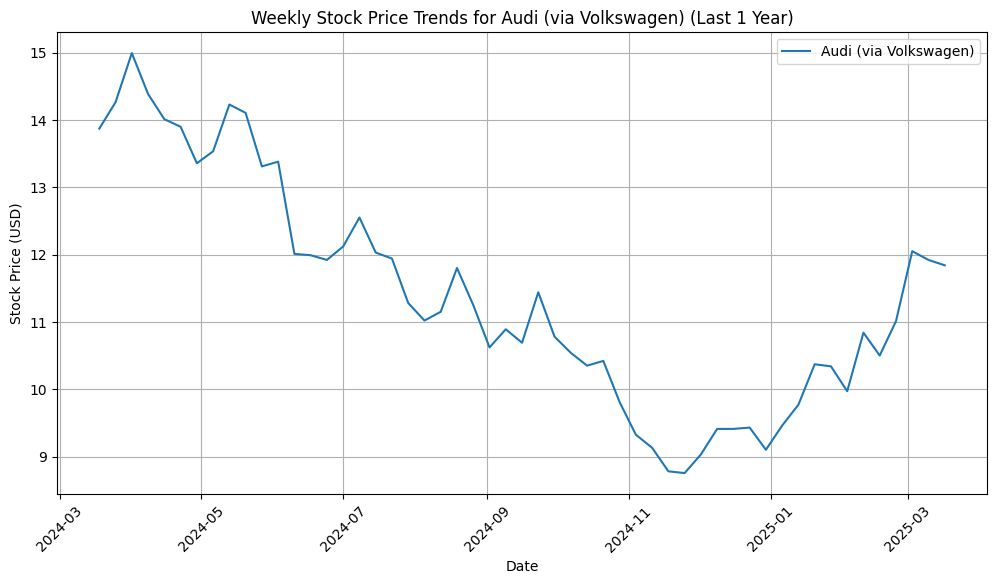

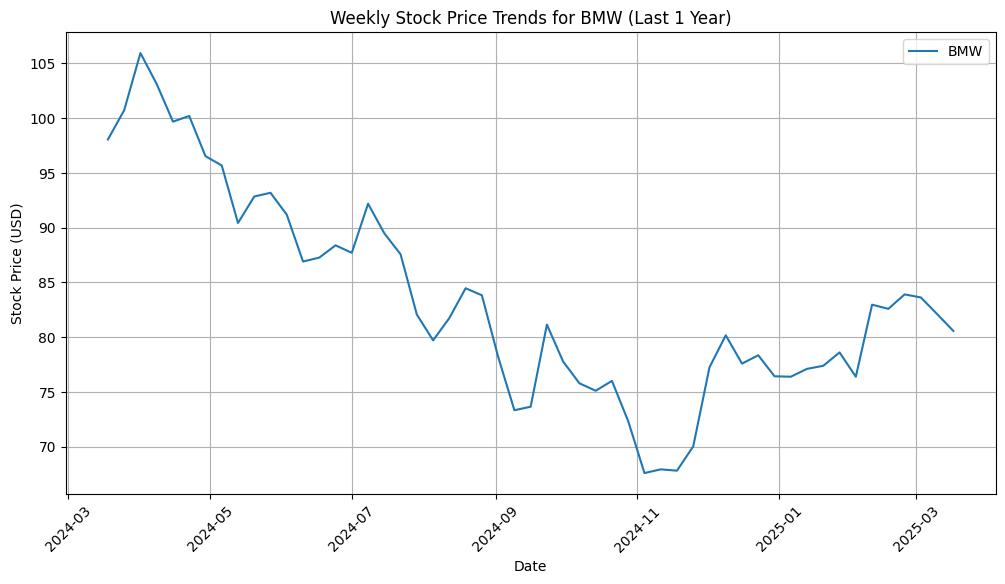

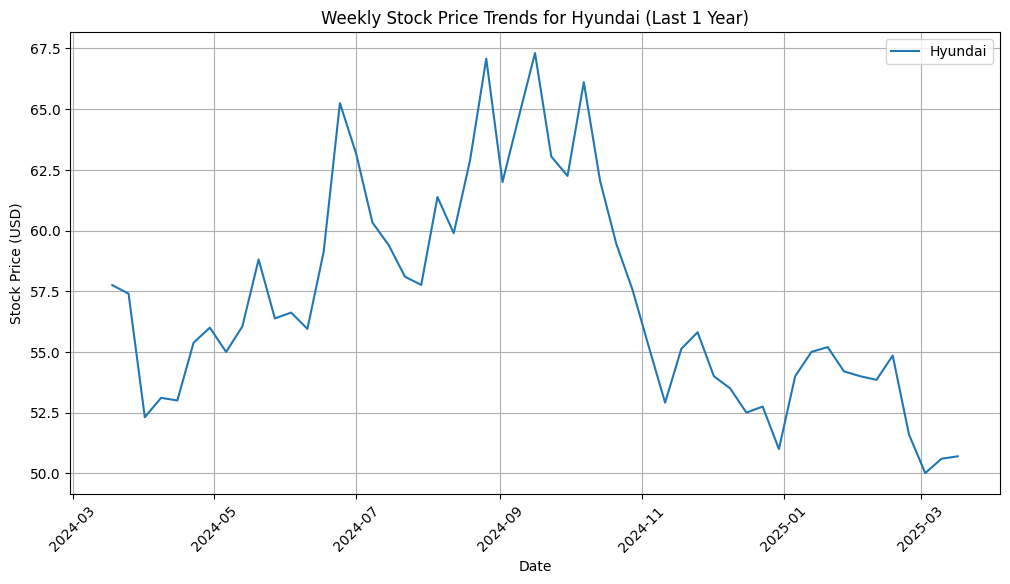

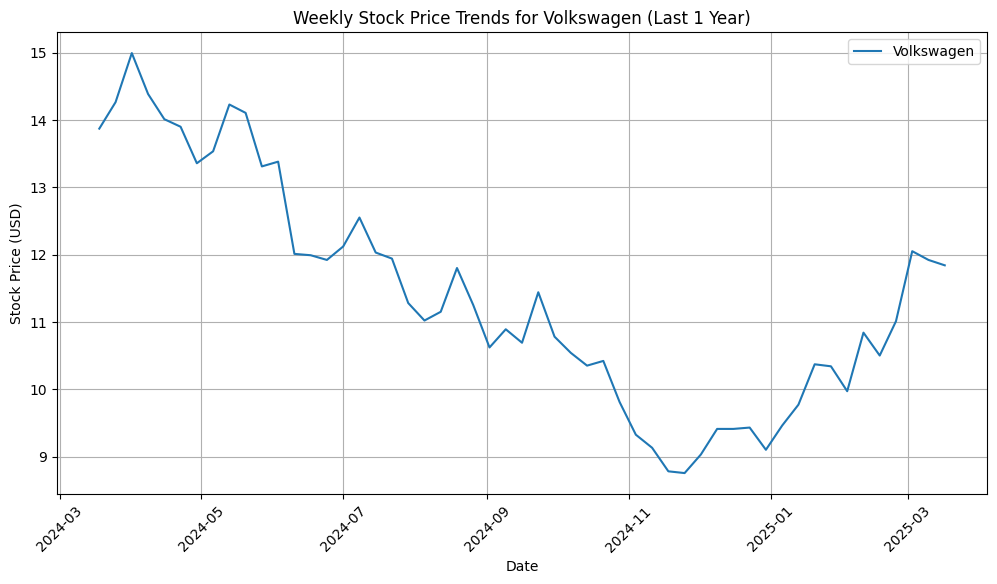

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define stock tickers
tickers = {
    "Tesla": "TSLA",
    "Mercedes-Benz": "MBGYY",
    "BYD": "BYDDY",
    "Xiaopeng": "XPEV",
    "Toyota": "TM",
    "Ford": "F",
    "Audi (via Volkswagen)": "VWAGY",  # Audi is part of Volkswagen
    "BMW": "BMW.DE",  # Use German Exchange ticker
    "Hyundai": "HYMTF",
    "Volkswagen": "VWAGY"
}

# Fetch real-time data
real_time_prices = {}
for company, ticker in tickers.items():
    stock = yf.Ticker(ticker)
    data = stock.history(period="1d")

    if not data.empty:  # Check if data is available
        real_time_prices[company] = {
            'Close': data.iloc[-1]['Close'],
            'Open': data.iloc[-1]['Open'],
            'High': data.iloc[-1]['High'],
            'Low': data.iloc[-1]['Low'],
            'Date': data.index[-1].strftime('%Y-%m-%d')
        }
    else:
        real_time_prices[company] = None  # Assign None if no data

# Display real-time prices
print("\nReal-Time Stock Prices:")
for company, price_data in real_time_prices.items():
    if price_data is not None:
        print(f"{company} ({price_data['Date']}):")
        print(f"  Open: ${price_data['Open']:.2f}")
        print(f"  High: ${price_data['High']:.2f}")
        print(f"  Low: ${price_data['Low']:.2f}")
        print(f"  Close: ${price_data['Close']:.2f}")
    else:
        print(f"{company}: No data available")

# Fetch historical data for the past year (monthly & weekly)
historical_data = {}
weekly_data = {}
daily_data = {}
for company, ticker in tickers.items():
    historical_data[company] = yf.download(ticker, period="1y", interval="1mo")
    weekly_data[company] = yf.download(ticker, period="1y", interval="1wk")
    daily_data[company] = yf.download(ticker, period="1wk", interval="1d")

# Save daily data to CSV files
for company, data in daily_data.items():
    data.to_csv(f"{company}_daily_data.csv")

# Save weekly data to CSV files
for company, data in weekly_data.items():
    data.to_csv(f"{company}_weekly_data.csv")

# Save monthly data to CSV files
for company, data in historical_data.items():
    data.to_csv(f"{company}_monthly_data.csv")

# Generate Weekly Report (latest available week) individually for each company
print("\nWeekly Stock Report (Last Available Week):")
for company, data in weekly_data.items():
    if not data.empty:
        latest_week = data.iloc[-1]  # Get last available week's data
        print(f"\n{company}:")
        print(f"  Open: ${float(latest_week['Open']):.2f}")
        print(f"  High: ${float(latest_week['High']):.2f}")
        print(f"  Low: ${float(latest_week['Low']):.2f}")
        print(f"  Close: ${float(latest_week['Close']):.2f}")
    else:
        print(f"\n{company}: No weekly data available")

# Plot daily trends for the last week individually for each company and save as JPG
for company, data in daily_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], marker='o', label=company)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"Daily Stock Price Trends for {company} (Last Week)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Show full date
    plt.savefig(f"{company}_daily_trends.jpg")
    plt.show()

# Plot monthly trends individually for each company and save as JPG
for company, data in historical_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], marker='o', label=company)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"Monthly Stock Price Trends for {company} (Last 1 Year)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Show full month name and year
    plt.savefig(f"{company}_monthly_trends.jpg")
    plt.show()

# Plot weekly trends individually for each company and save as JPG
for company, data in weekly_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label=company)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"Weekly Stock Price Trends for {company} (Last 1 Year)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.savefig(f"{company}_weekly_trends.jpg")
    plt.show()